In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = 'D:\\PAUL\\Documents\\GitHub\\2nd-ML100Days\\DATA\\Part01'

In [3]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [5]:
app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
app_train.select_dtypes(['float']).columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [7]:
app_train[app_train.columns[0:20]].select_dtypes(['float']).head()


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0


In [8]:
new_app_train__ = pd.DataFrame(app_train['TARGET']).join(app_train['AMT_INCOME_TOTAL'])
new_app_train__ = new_app_train__.join(app_train['AMT_CREDIT'])
new_app_train__ = new_app_train__.join(app_train['AMT_ANNUITY'])
new_app_train__ = new_app_train__.join(app_train['AMT_GOODS_PRICE'])
new_app_train__ = new_app_train__.join(app_train['REGION_POPULATION_RELATIVE'])
new_app_train__ = new_app_train__.join(app_train['DAYS_REGISTRATION'])

In [9]:
new_app_train__['AMT_INCOME_TOTAL'].head()

0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [11]:
for column in new_app_train__.columns:
    print("mean of "+str(column)+" : ",new_app_train__[column].mean())

for column in new_app_train__.columns:
    print("standard deviation of  "+str(column)+" : ",new_app_train__[column].std())

for column in new_app_train__.columns:
    print("sample variance of  "+str(column)+" : ",new_app_train__[column].var())

mean of TARGET :  0.08072881945686496
mean of AMT_INCOME_TOTAL :  168797.9192969845
mean of AMT_CREDIT :  599025.9997057016
mean of AMT_ANNUITY :  27108.573909183444
mean of AMT_GOODS_PRICE :  538396.2074288895
mean of REGION_POPULATION_RELATIVE :  0.02086811205778947
mean of DAYS_REGISTRATION :  -4986.120327538419
standard deviation of  TARGET :  0.272418645647685
standard deviation of  AMT_INCOME_TOTAL :  237123.14627883647
standard deviation of  AMT_CREDIT :  402490.776995946
standard deviation of  AMT_ANNUITY :  14493.737315117392
standard deviation of  AMT_GOODS_PRICE :  369446.4605400129
standard deviation of  REGION_POPULATION_RELATIVE :  0.013831280122699869
standard deviation of  DAYS_REGISTRATION :  3522.88632096305
sample variance of  TARGET :  0.07421191849651897
sample variance of  AMT_INCOME_TOTAL :  56227386501.174484
sample variance of  AMT_CREDIT :  161998825566.80032
sample variance of  AMT_ANNUITY :  210068421.35962632
sample variance of  AMT_GOODS_PRICE :  136490687

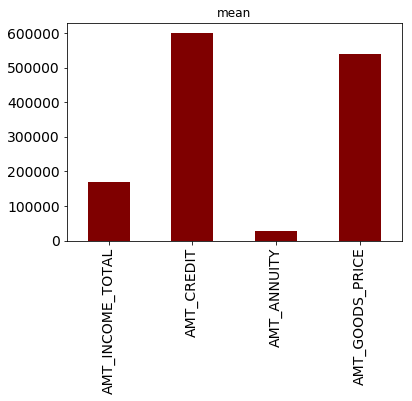

In [26]:
df = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
new_app_train__[df].mean().plot(kind='bar', stacked=True, colormap='OrRd_r', fontsize=14, title='mean')

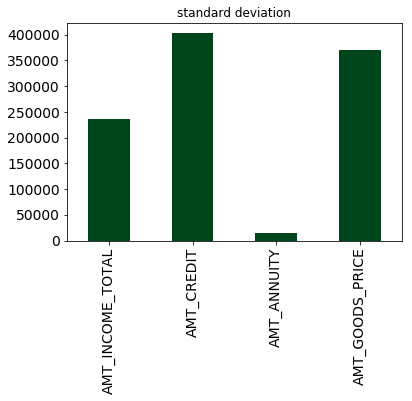

In [27]:
new_app_train__[df].std().plot(kind='bar', stacked=True, colormap='BuGn_r', fontsize=14, title='standard deviation')

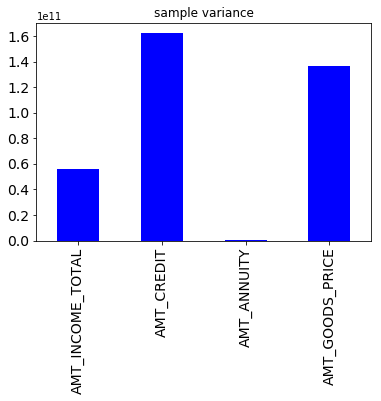

In [29]:
new_app_train__[df].var().plot(kind='bar', stacked=True, colormap='winter', fontsize=14, title='sample variance')